In [1]:
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
import example_deeper
import certa.metrics

In [3]:
tests = {
    "jaccard" : example_deeper.run(certa.metrics.jaccard_similarity),
    "manhattan" : example_deeper.run(certa.metrics.manhattan_distance),
    "cosine" : example_deeper.run(certa.metrics.get_cosine),
    "euclidean" : example_deeper.run(certa.metrics.euclidean_distance),
    "mahalanobis" : example_deeper.run(certa.metrics.mahalanobis_distance),
}

In [ ]:
tests_results = {}
for test_name, test in tests.items():
    print("Starting test for:", test_name)
    results = []
    for _, _, mean, impact in test:
        result = mean, impact
        print(result)
        results.append(result)
    tests_results[test_name] = results

Starting test for: jaccard
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Tupla_A (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Tupla_B (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
Embedding_lookup (Embedding)    (None, None, 50)     20000100    Tupla_A[0][0]                    
                                                                 Tupla_B[0][0]                    
Total params: 20,000,100
Trainable params: 0
Non-trainable params: 20,000,100
________________________________________________________________________________________

100%|██████████| 8/8 [00:01<00:00,  5.03it/s]


(0.03805216295378549, 0.0)
Starting test for: manhattan


In [13]:
tests_results

{'jaccard': [(0.04094181009518203, 0.005376344086021506)],
 'manhattan': [(0.040075625885616646, 0.0)],
 'cosine': [(0.029081665056267966, 0.0)],
 'euclidean': [(0.030489127921021503, 0.0)],
 'mahalanobis': [(0.02917441556399519, 0.0)]}

### TO-DO

- mettere come parametri di run le varie metriche
- bar plot per ogni metrica su impact e mean drop
- effettuare scelta random delle coppie, invece che sequenziale (attenzione al seed)

In [6]:
#utility functions


to_feature_index = {
    "mean_drop": 0, 
    "impact": 1
}

'''
extracts single feature from the results of a single metric test based on the name

example: 

results = [(1, 2), (0, 50)]
feature_name = "mean_drop"

output = [1, 0]
'''
def get_feature(results, feature_name):
    feature_name = feature_name.lower()
    feature_index = to_feature_index[feature_name]
    feature_results = []
    for result in results:
        feature_results.append(result[feature_index])
    return feature_results


def get_mean_drops(results):
    return get_feature(results, "mean_drop")
    
def get_impacts(results):
    return get_feature(results, "impact")


def plot_results(mean_metrics_results, title): 
    plt.bar(range(len(mean_metrics_results)), list(mean_metrics_results.values()), align='center')
    plt.xticks(range(len(mean_metrics_results)), list(mean_metrics_results.keys()))
    plt.title(title)
    plt.show()
'''
extracts single feature from the results of all the metric tests

example: 

all_results = {
    "cosine": [(20, 10), (-15, 0)],
    "euclidean": [(77, 12), (42, -13)],
}

feature_name = "mean_drop"

output = {
    "cosine": [20, -15],
    "euclidean": [77, 42],
}
'''
def extract_feature(all_results, feature_name):
    all_results_copy = all_results.copy()
    for test_name, results_raw in all_results_copy.items():
        results_filtered = get_feature(results_raw, feature_name)
        all_results_copy[test_name] = results_filtered
    return all_results_copy


def mean_feature(feature_results):
    import statistics
    mean_results = {}
    for test_name, results in feature_results.items():
        mean_results[test_name] = statistics.mean(results)
    return mean_results

In [7]:
extract_feature(tests_results, "mean_drop")

{'jaccard': [0.04094181009518203],
 'manhattan': [0.040075625885616646],
 'cosine': [0.029081665056267966],
 'euclidean': [0.030489127921021503],
 'mahalanobis': [0.02917441556399519]}

In [8]:
extract_feature(tests_results, "impact")

{'jaccard': [0.005376344086021506],
 'manhattan': [0.0],
 'cosine': [0.0],
 'euclidean': [0.0],
 'mahalanobis': [0.0]}

In [9]:
drops = extract_feature(tests_results, "mean_drop")
mean_drops = mean_feature(drops)
mean_drops

{'jaccard': 0.04094181009518203,
 'manhattan': 0.040075625885616646,
 'cosine': 0.029081665056267966,
 'euclidean': 0.030489127921021503,
 'mahalanobis': 0.02917441556399519}

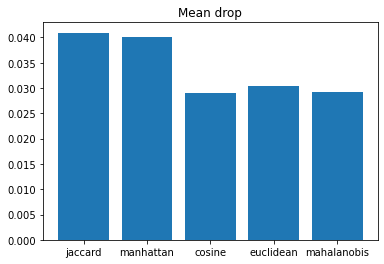

In [10]:
plot_results(mean_drops, "Mean drop")